In [106]:
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

crime = pd.read_csv('CRIMENY.csv', thousands=",")

In [107]:
crime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,NaN
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,NaN
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,NaN
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,NaN


In [109]:
crime.columns = ['city', 'population', 'violent crime', 'murder', 'rape1', 'rape2', 'robbery', 'aggravatedd assault', 
                'property crime', 'burglary', 'larceny', 'motor vehicle theft', 'arson3', 'unnamed3']
crime.head(3)

,city,population,violent crime,murder,rape1,rape2,robbery,aggravatedd assault,property crime,burglary,larceny,motor vehicle theft,arson3,unnamed3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,NaN
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,NaN
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,NaN


𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦

In [140]:
data = pd.DataFrame()
data['property crime'] = crime['property crime']
data['population'] = crime['population']
data['population_sq'] = (crime['population']**2)
data['murder'] = (crime['murder'] > 0).astype(int)
data['robbery'] = (crime['robbery'] > 0).astype(int)
data = data.dropna()
data.head(10)

,property crime,population,population_sq,murder,robbery
0,12.0,1861.0,3.463321e+06,0,0
1,24.0,2577.0,6.640929e+06,0,0
2,16.0,2846.0,8.099716e+06,0,0
3,4090.0,97956.0,9.595378e+09,1,1
4,223.0,6388.0,4.080654e+07,0,1
5,46.0,4089.0,1.671992e+07,0,1
6,10.0,1781.0,3.171961e+06,0,0
7,2118.0,118296.0,1.399394e+10,1,1
8,210.0,9519.0,9.061136e+07,0,1
9,405.0,18182.0,3.305851e+08,0,1


In [143]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['property crime'].values.reshape(-1, 1)
X = data[['population','population_sq', 'murder', 'robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.9961247104988709


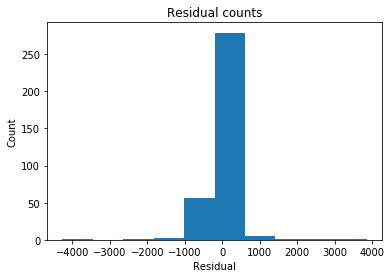

In [146]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['property crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

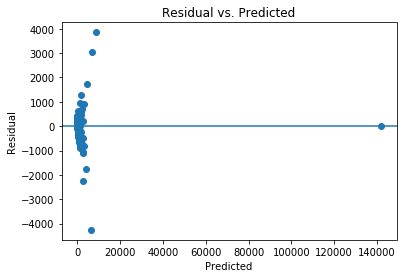

In [147]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [149]:
correlation_matrix = X.corr()
display(correlation_matrix)

,population,population_sq,murder,robbery
population,1.000000,0.998264,0.162309,0.064371
population_sq,0.998264,1.000000,0.133067,0.043983
murder,0.162309,0.133067,1.000000,0.313271
robbery,0.064371,0.043983,0.313271,1.000000


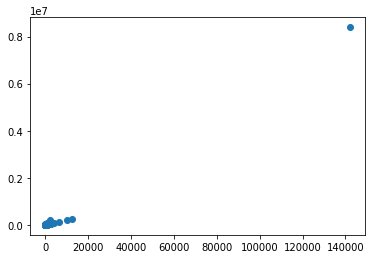

In [150]:
plt.scatter(data['property crime'], data['population'])

In [158]:
regr = linear_model.LinearRegression()
Y = data['property crime'].values.reshape(-1, 1)
X = data[['population_sq']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[2.00879725e-09]]

Intercept: 
 [383.70629775]

R-squared:
0.9821347169821532


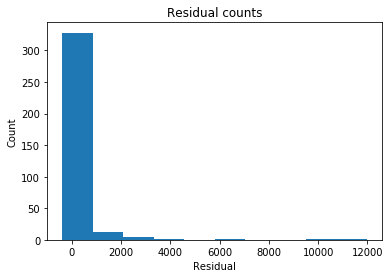

In [157]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['property crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()